In [1]:
import tensorflow.keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
print("Importing data from directory...")

path = "dataset/train/"
path_test = "dataset/test/"
files = os.listdir(path)[:31]
files_test = os.listdir(path_test)[:31]

classes={'1':0, '2':1, '3':2, '4':3, '5':4, '6':5, '7':6, '8':7, '9':8, '10':9, '11':10, '12':11, '25':12, '38':13, '51':14,
        '64':15, '77':16, '90':17, '93':18, '105':19, '120':20, '134':21, '149':22, '164':23, '179':24, '190':25, '198':26,
        '208':27, '250':28, '264':29, '274':30 }


Importing data from directory...


In [3]:
print("Labeling train data...")
img_train=[]
lbl_train=[]

for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_train.append(img)
        lbl_train.append(classes[cl])

Labeling train data...


In [4]:
print("Labeling test data...")
img_test=[]
lbl_test=[]

for cl in classes:
    pth = path_test+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        img_test.append(img)
        lbl_test.append(classes[cl])

Labeling test data...


In [5]:
print("converting to np array")

img_train = np.array(img_train)
lbl_train = np.array(lbl_train)

img_test = np.array(img_test)
lbl_test = np.array(lbl_test)

save_size = lbl_train.size

print(save_size)

converting to np array
5250


In [6]:
np.save('../data/images', img_train)
np.save('../data/labels', lbl_train)
np.save('../data/size', save_size)
print("Saved for updating")

Saved for updating


0


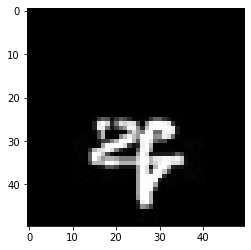

In [7]:
plt.imshow(img_train[1], cmap='gray')
print(lbl_train[1])

In [8]:
print("Preprocessing data for training....")

Preprocessing data for training....


In [9]:
img_train = img_train.reshape(img_train.shape[0], img_train.shape[1], img_train.shape[2], 1)
img_test = img_test.reshape(img_test.shape[0], img_test.shape[1], img_test.shape[2], 1)

In [10]:
img_train = img_train / 255
img_test = img_test / 255

In [11]:
img_train = img_train.astype('float32')
img_test = img_test.astype('float32')

In [12]:
print("Train shape", img_train.shape)
print("Test shape", img_test.shape)

Train shape (5250, 50, 50, 1)
Test shape (688, 50, 50, 1)


In [13]:
epochs = 100
batch = 32

print("Epochs : ",epochs)
print("Batch size : ",batch)

Epochs :  100
Batch size :  32


In [14]:
model = Sequential()
model.add(Conv2D(64, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(31, activation='softmax'))


In [15]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001),
             loss=tensorflow.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
print("Training....")
acc = model.fit(img_train, lbl_train, epochs=epochs, batch_size=batch, validation_data=(img_test, lbl_test))

Training....
Epoch 1/100
165/165 [==============================] - 3s 10ms/step - loss: 3.0918 - accuracy: 0.1324 - val_loss: 2.4969 - val_accuracy: 0.2311
Epoch 2/100
165/165 [==============================] - 2s 9ms/step - loss: 1.9186 - accuracy: 0.4171 - val_loss: 2.1522 - val_accuracy: 0.3517
Epoch 3/100
165/165 [==============================] - 2s 9ms/step - loss: 1.2626 - accuracy: 0.5979 - val_loss: 1.1451 - val_accuracy: 0.6279
Epoch 4/100
165/165 [==============================] - 2s 9ms/step - loss: 0.8899 - accuracy: 0.7240 - val_loss: 1.0299 - val_accuracy: 0.6817
Epoch 5/100
165/165 [==============================] - 2s 10ms/step - loss: 0.6730 - accuracy: 0.7848 - val_loss: 0.9458 - val_accuracy: 0.7093
Epoch 6/100
165/165 [==============================] - 2s 9ms/step - loss: 0.5060 - accuracy: 0.8392 - val_loss: 0.4274 - val_accuracy: 0.8561
Epoch 7/100
165/165 [==============================] - 2s 9ms/step - loss: 0.4109 - accuracy: 0.8705 - val_loss: 0.3797 - val_a

Epoch 58/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0592 - accuracy: 0.9870 - val_loss: 0.4969 - val_accuracy: 0.9491
Epoch 59/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0702 - accuracy: 0.9846 - val_loss: 0.5334 - val_accuracy: 0.9535
Epoch 60/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0617 - accuracy: 0.9842 - val_loss: 0.4423 - val_accuracy: 0.9578
Epoch 61/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0661 - accuracy: 0.9857 - val_loss: 0.5272 - val_accuracy: 0.9608
Epoch 62/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0651 - accuracy: 0.9844 - val_loss: 0.4807 - val_accuracy: 0.9564
Epoch 63/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0640 - accuracy: 0.9850 - val_loss: 0.4529 - val_accuracy: 0.9578
Epoch 64/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.4218 - val_accuracy:

In [17]:
score = model.evaluate(img_test, lbl_test)

22/22 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.9578


<Figure size 576x360 with 0 Axes>

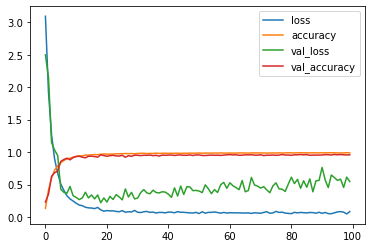

In [18]:
plt.figure(figsize=(8,5))
pd.DataFrame(acc.history).plot()
plt.show()

In [19]:
print(model.summary()) 
print('Loss : ', score[0])
print('Accuracy :',score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 128)         0

In [20]:
model.save('../model.h5')
print("Model saved")

Model saved
